In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('score_updated.csv')
df = pd.DataFrame(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
df.dtypes

,0
Hours,float64
Scores,int64


In [13]:
#check missing values
df.isnull().sum()

,0
Hours,0
Scores,0


In [14]:
#Check duplicates data
df.duplicated().sum()

1

In [16]:
#Drop duplicate data
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Text(0.5, 0, 'Hours')

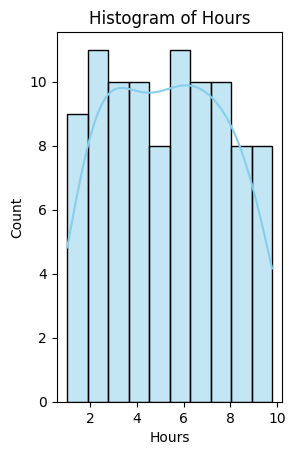

In [17]:
#Histogram for Hours
plt.subplot(1, 2, 1)
sns.histplot(df['Hours'], bins=10, kde=True, color ='skyblue')
plt.title('Histogram of Hours')
plt.xlabel('Hours')

Text(0.5, 0, 'Hours')

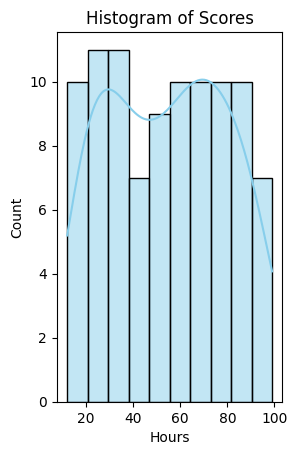

In [19]:
#Histogram for Scores
plt.subplot(1, 2, 1)
sns.histplot(df['Scores'], bins=10, kde=True, color ='skyblue')
plt.title('Histogram of Scores')
plt.xlabel('Hours')

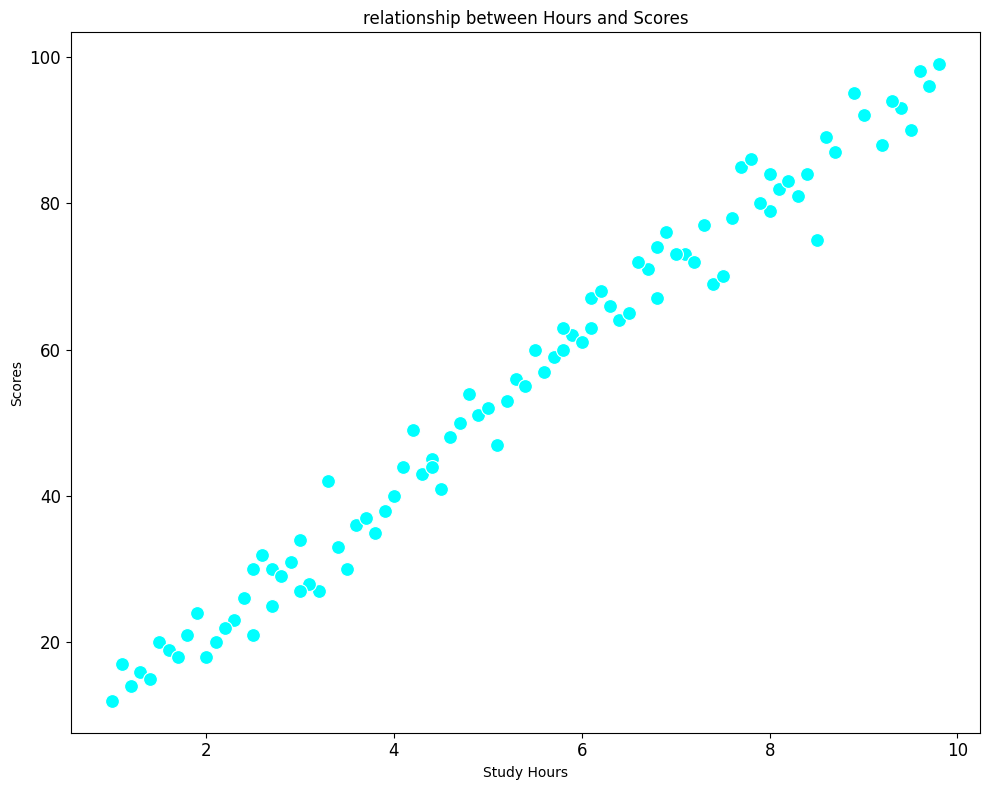

In [10]:
#Visualize the data
plt.figure(figsize=(10,8))
sns.scatterplot(x='Hours', y='Scores', data=df, color='cyan', s=100)
plt.title("relationship between Hours and Scores")
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
#split data train and data test
X = df['Hours'].values
y = df['Scores'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Train the model with Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train.reshape(-1, 1),y_train)


LinearRegression()

In [24]:
#make predictions
y_pred = lin_reg.predict(X_test.reshape(-1,1))


In [27]:
#Evaluate the model
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lin = r2_score(y_test, y_pred)
print("Linear Regression - RMSE:", rmse_lin)
print("Linear Regression - R2 Score:", r2_lin)

Linear Regression - RMSE: 4.254996378767075
Linear Regression - R2 Score: 0.9665340353293453


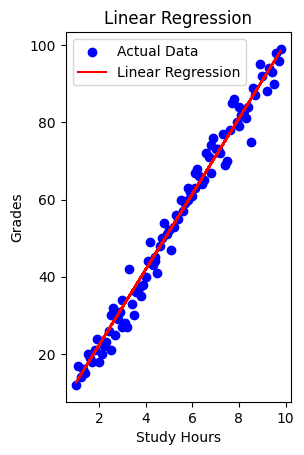

In [32]:
#Linear Regression Model Visualization
# Reshape X for correct plotting
X_reshaped = X.reshape(-1, 1)  # Convert to 2D array

# Plotting Linear Regression Model
plt.subplot(1, 2, 1)
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, lin_reg.predict(X_reshaped), color="red", label="Linear Regression")
plt.title("Linear Regression")
plt.xlabel("Study Hours")
plt.ylabel("Grades")
plt.legend()
